#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**
####**created by: Suprava Das**

# **Problem Statement:**


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset cab also be downloaded from kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in Google Colab.

In [ ]:
# installed missing package gensim
!pip install gensim

In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Preprocessing**

In [ ]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/fake.csv')
true_news_data = pd.read_csv('/content/true.csv')

**Q1.** View the imported csv file data using Pandas Dataframe.

In [ ]:
fake_news_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
true_news_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [ ]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [ ]:
print(df.isnull().sum())

title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [ ]:
##There is no null values

**Q3.** shuffle the data.

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [ ]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,CAN YOU GUESS THE ONE THING Majority Of Bernie...,The function of socialism is to raise sufferin...,left-news,"Jun 5, 2016",1
1,Boiler Room EP #72 – Trailer Parks in Heaven,Tune in to the Alternate Current Radio Network...,US_News,"September 3, 2016",1
2,Lebanon's Hariri leaves Cairo for Lebanon: Egy...,"CAIRO (Reuters) - Saad al-Hariri, who resigned...",worldnews,"November 21, 2017",0
3,ISLAMIC TERRORIST ORGANIZATION Joins Obama And...,"What does Obama, the Democrat Party, the state...",politics,"Dec 8, 2015",1
4,OBAMA STEALING To Keep His Pet Program Afloat,Helloooo! Where the heck is Congress? $7 billi...,Government News,"Feb 25, 2016",1
5,As Trump Takes 6th Golf Trip As President The...,Trump spent his the sixth weekend golfing and ...,News,"March 18, 2017",1
6,Santilli Freed Under Plea Pact as Vegas Shooti...,LONG SHADOW: The wake of the recent mass trag...,US_News,"October 14, 2017",1
7,BADASS CAMPUS COPS Cite Students For Wearing E...,Trigger warning If liberal schools and badass ...,left-news,"Apr 14, 2016",1
8,SURPRISE! HISPANIC REPORTER Tries To Call Inju...,This video is just one of many examples showin...,left-news,"Jun 11, 2016",1
9,OUTRAGEOUS! NANCY PELOSI Claims Obamacare Hono...,,Government News,"Mar 25, 2017",1


**Q4.** view the text content of a random data point.

In [ ]:
import random
rand_idx = random.randrange(len(df))
print("Index:", rand_idx)
# adjust column name 'text' to whatever column contains news body in your dataset
print("Text:\n", df.loc[rand_idx, 'text'])
print("\nLabel/class:", df.loc[rand_idx, 'class'] if 'class' in df.columns else df.loc[rand_idx, 'label'])

Index: 3387
Text:
 CAIRO (Reuters) - Syrian opposition will form a 50-member delegation to participate in U.N.-sponsored talks in Geneva, the main Syrian opposition meeting in the Saudi capital Riyadh told a news conference late on Thursday.   There will be further meetings tomorrow to decide the members of the delegation and determine its working mechanism,  Basma Qadmani, a member of the National Coalition for Syrian Revolutionary and Opposition Forces, said.  

Label/class: 0


**Data Visualization**

Text(0, 0.5, 'Number of News')

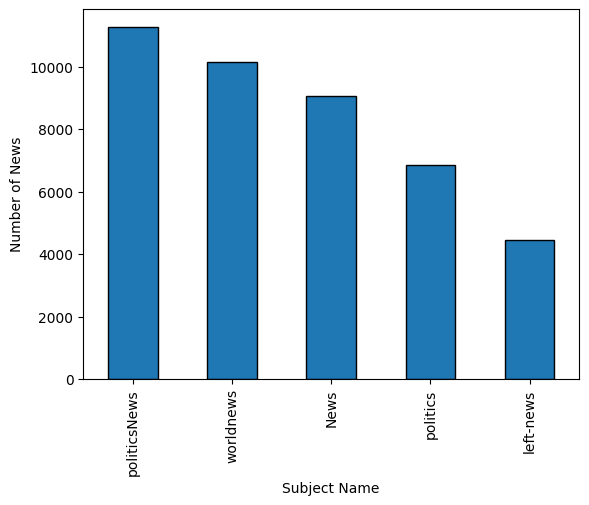

In [ ]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on differenet subject.

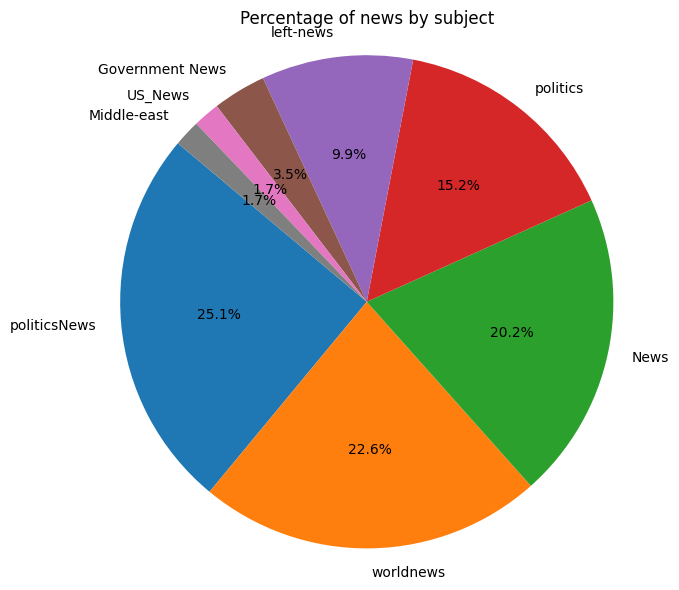

In [ ]:
import matplotlib.pyplot as plt

# replace 'subject' with the actual column name for subject/category
if 'subject' not in df.columns:
    print("Column 'subject' not found. Columns:", df.columns)
else:
    subject_counts = df['subject'].value_counts()
    plt.figure(figsize=(7,7))
    plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Percentage of news by subject")
    plt.axis('equal')
    plt.show()

**Text Processing**

In [ ]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [ ]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [ ]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'washington reuters president barack obama said on wednesday the united states is not as organized as it needs to be to step up its protections against cyber threats and that making improvements would be a complex task lasting well beyond his time in office obama made his comments after meeting in the oval office with two advisers who will lead a new commission tasked with making recommendations by the end of the year on a long term plan for cybersecurity upgrades obama did not respond to questions from reporters about a court order demanding that apple inc unlock an iphone of one of the shooters in december s attacks in san bernardino california '

# **Building Model**

In [ ]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']

**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

print("Train size:", len(x_train), "Test size:", len(x_test))

Train size: 33673 Test size: 11225


## **Word Embedding ( Word2Vec )**

In [ ]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [ ]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [ ]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

##**Logistic Regression**

In [ ]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 1 0 0]
Accuracy Score on Test Data:  0.9434298440979956


####**Accuracy Checking**

In [ ]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9434298440979956
Precision: 0.9485949280328992
Recall: 0.9429398739567365
F1 score: 0.9457589476381651


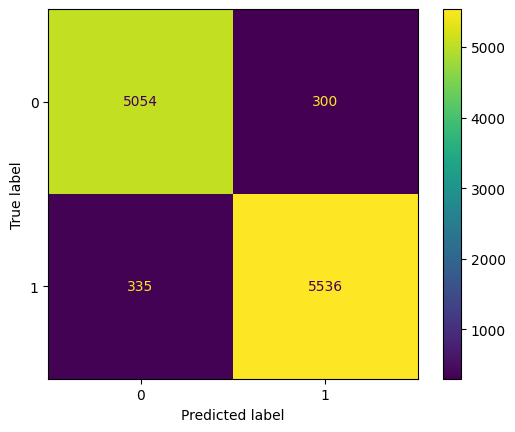

In [ ]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(xv_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred1 = rf_model.predict(xv_test)
print("Prediction on test data: ",y_pred1)
print("Accuracy Score on Test Data: ",rf_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 1 0 0]
Accuracy Score on Test Data:  0.9371937639198218


####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1))
print('Recall:', recall_score(y_test, y_pred1))
print('F1 score:', f1_score(y_test, y_pred1))

Accuracy: 0.9371937639198218
Precision: 0.9376482548288716
Recall: 0.9425992164878215
F1 score: 0.9401172173617599


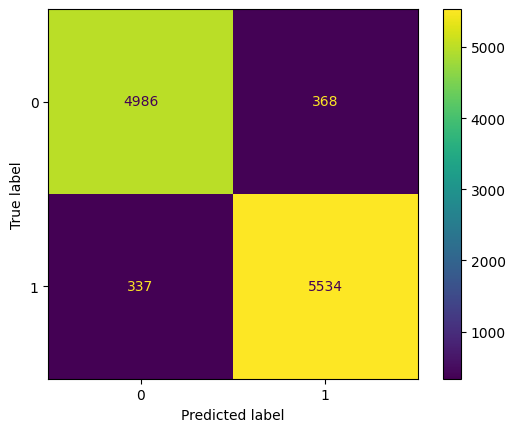

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred1)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

#**Save the Model using pickle**

In [ ]:
# save the logistic regression model as pickle file
import pickle
import os

filename1 = '/content/drive/My Drive/models/word2vec_logistic_model.pickle'

# Create the directory if it doesn't exist
output_dir = os.path.dirname(filename1)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [ ]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9434298440979956


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

In [ ]:
import pickle

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

In [ ]:
with open("random_forest_model.pkl", "rb") as f:
    loaded_rf = pickle.load(f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open("/content/drive/MyDrive/random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.






**TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
vect_tfidf = TfidfVectorizer(max_features=10000, stop_words="english")
x_train_tfidf = vect_tfidf.fit_transform(x_train)
x_test_tfidf  = vect_tfidf.transform(x_test)

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada = AdaBoostClassifier(n_estimators=200, random_state=42)
ada.fit(x_train_tfidf, y_train)
y_pred_ada = ada.predict(x_test_tfidf)

print("AdaBoost + TF-IDF Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost + TF-IDF Accuracy: 0.995011135857461


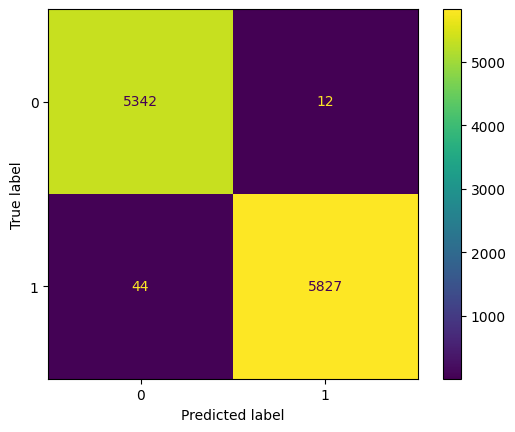

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred_ada)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6,
                    random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb.fit(x_train_tfidf, y_train)
y_pred_xgb = xgb.predict(x_test_tfidf)

print("XGBoost + TF-IDF Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:12:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost + TF-IDF Accuracy: 0.9966146993318485


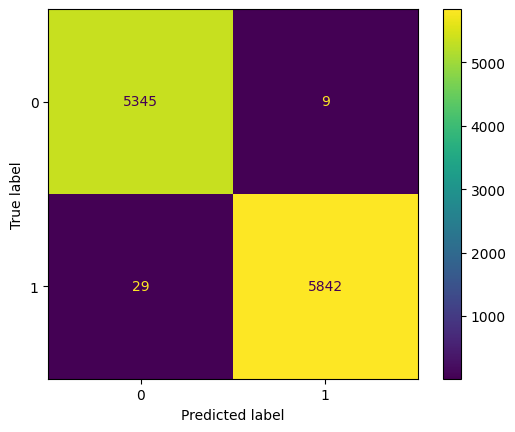

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

**Comparison**



In [ ]:
results = {
    "AdaBoost + TF-IDF": accuracy_score(y_test, y_pred_ada),
    "XGBoost + TF-IDF": accuracy_score(y_test, y_pred_xgb),
}

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

AdaBoost + TF-IDF: 0.9950
XGBoost + TF-IDF: 0.9966
